<a href="https://colab.research.google.com/github/srujanperam/pytorch_beginner_practice/blob/main/cnn_basic_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# mnist = number of images, hieight, width, color channel
# download and save the data
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [5]:
train_loader

In [6]:
# define cnn model
# describe convolutional layer and what it's doing (2 convolution layers)

conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=0)
# 6 outputs of conv1 becomes 6 inputs for conv2
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0)

In [7]:
# get 1 mnist record/image

for i, (X_train, y_train) in enumerate(train_loader):
    break

In [8]:
X_train.shape

torch.Size([10, 1, 28, 28])

In [9]:
x = X_train.view(10, 1, 28, 28)

In [10]:
x = F.relu(conv1(x))

In [11]:
x.shape

torch.Size([10, 6, 26, 26])

In [12]:
x = F.max_pool2d(x, 2, 2)

In [13]:
x.shape

torch.Size([10, 6, 13, 13])

In [14]:
x = F.relu(conv2(x))

In [15]:
x.shape

torch.Size([10, 16, 11, 11])

In [16]:
x = F.max_pool2d(x, 2, 2)

In [17]:
x.shape

torch.Size([10, 16, 5, 5])

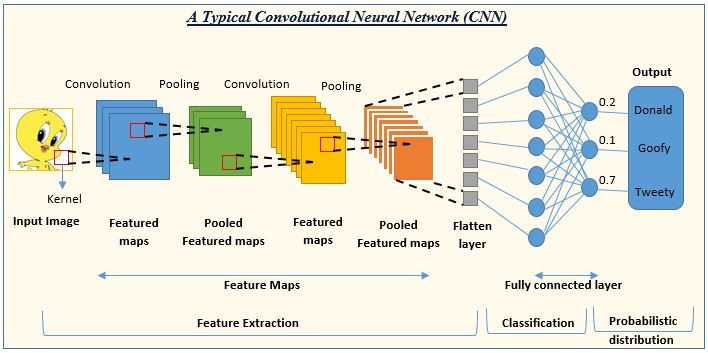

In [18]:
class convolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=0)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0)

    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 120 is just playing number random
    self.fc2 = nn.Linear(120, 84) # reducing 120 to 84 again 84 is random playing
    self.fc3 = nn.Linear(84, 10) # ouput is 10

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)

    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)

    x = x.view(-1, 16*5*5) # flattening the tensor
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x, dim=1)

In [19]:
# create an instance of our module
torch.manual_seed(41)
model = convolutionalNetwork()
model

convolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
# loss funtion optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller learning rate

In [21]:
import time
start_time = time.time()

# created variables to track things
train_loss = []
train_correct = []
test_loss = []
test_correct = []
epochs = 5

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 # start out batches at 1
    y_pred = model(X_train) # this is 2d
    loss = criterion(y_pred, y_train) # how off are we? comparing pred and actuals

    predicted = torch.max(y_pred.data, 1)[1] # add up number of correct predictions
    batch_corr = (predicted == y_train).sum()

    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if b % 600 == 0:
      print(f'epoch: {i} batch: {b} loss: {loss.item()}')

  train_loss.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]

      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_loss.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'training time: {total/60} minutes!!')

epoch: 0 batch: 600 loss: 0.1623610556125641
epoch: 0 batch: 1200 loss: 0.1502392590045929
epoch: 0 batch: 1800 loss: 0.4744560718536377
epoch: 0 batch: 2400 loss: 0.14238706231117249
epoch: 0 batch: 3000 loss: 0.007758188061416149
epoch: 0 batch: 3600 loss: 0.3836284875869751
epoch: 0 batch: 4200 loss: 0.0038223876617848873
epoch: 0 batch: 4800 loss: 0.0021286322735249996
epoch: 0 batch: 5400 loss: 0.0569545142352581
epoch: 0 batch: 6000 loss: 0.00038789428072050214
epoch: 1 batch: 600 loss: 0.005851339548826218
epoch: 1 batch: 1200 loss: 0.3855525553226471
epoch: 1 batch: 1800 loss: 0.004819948226213455
epoch: 1 batch: 2400 loss: 0.003216963727027178
epoch: 1 batch: 3000 loss: 0.0332382395863533
epoch: 1 batch: 3600 loss: 0.5372857451438904
epoch: 1 batch: 4200 loss: 0.04561494290828705
epoch: 1 batch: 4800 loss: 0.0007510822033509612
epoch: 1 batch: 5400 loss: 0.0001173773780465126
epoch: 1 batch: 6000 loss: 0.14201366901397705
epoch: 2 batch: 600 loss: 0.023733172565698624
epoch: 2

In [23]:
test_load_everything = torch.utils.data.DataLoader(test_data, batch_size=10000, shuffle=True)
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

In [24]:
 correct

tensor(9857)